In [1]:
#Import Library that will be used
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import operator as op
import warnings
from sqlalchemy import create_engine
import pickle
warnings.simplefilter(action='ignore', category=FutureWarning)

##### Memanggil Dataset

In [2]:
# Credentials to database connection
hostname="localhost"
dbname="dbrajawali"
uname="root"
pwd=""

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [3]:
# called table that will be analyzed
sql_query = pd.read_sql('SELECT * FROM `tbldetailjual`', engine)
data_transaksi = pd.DataFrame(sql_query, columns=['fakturjual','tanggaljual','kodebarang','namabarang','satuan',
                                                  'harga', 'jumlah', 'subtotal'])
data_transaksi = data_transaksi.iloc[15009:]
data_transaksi

,fakturjual,tanggaljual,kodebarang,namabarang,satuan,harga,jumlah,subtotal
15009,3182627,1/4/2022,PAS-KAL-BEN-LUM,pasir kali bening lumajang,pick up,290000,1,290000
15010,3182627,1/4/2022,SMNGRS-40,Semen Gresik PPC 40 kg,zak,52000,1,52000
15011,3182626,1/4/2022,POLY-MES-AQUA,Fiber Serabut/Polyester Mesh Aqua,pc,16000,1,16000
15012,3182626,1/4/2022,CWP-NDRP-GL-002,Cat Waterproofing Coating No Drop 002/Abu2,gln,185000,1,185000
15013,3182626,1/4/2022,PAK-BET-UNO-11/2,Paku beton uno11/2,ktk,15000,1,15000
...,...,...,...,...,...,...,...,...
18801,FJ20120135,9/15/2022,AMP-ROL-TAI-100/ECER,Amplas Roll Taiyo 100/ecer,mtr,7667,2,11500
18802,FJ20120135,9/15/2022,PK-SQ-4,"Paku SQ 4""",kg,20000,0,5000
18803,FJ20120135,9/15/2022,KWTAYA-PSR-TBL/ECER,Kawat Ayakan Pasir tebal/jumbo 8x8/ecer,mtr,27000,1,27000
18804,FJ20120135,9/15/2022,BAL-PVC-UNNU-PVBV02-1/2,Ballvalve pvc 1/2 UNNU type PVBV 02,buah,14000,1,14000


In [43]:
data_transaksi.to_excel('data_transaksi_2022.xlsx')

##### Data Cleansing

In [4]:
data_transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 15009 to 18805
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fakturjual   3797 non-null   object
 1   tanggaljual  3797 non-null   object
 2   kodebarang   3797 non-null   object
 3   namabarang   3797 non-null   object
 4   satuan       3797 non-null   object
 5   harga        3797 non-null   object
 6   jumlah       3797 non-null   object
 7   subtotal     3797 non-null   object
dtypes: object(8)
memory usage: 237.4+ KB


In [5]:
data_transaksi['tanggaljual'] = data_transaksi['tanggaljual'].astype('datetime64[ns]') 
data_transaksi[['harga','jumlah','subtotal']] = data_transaksi[['harga','jumlah','subtotal']].astype('float64') 

In [6]:
data_transaksi.isna().sum()

fakturjual     0
tanggaljual    0
kodebarang     0
namabarang     0
satuan         0
harga          0
jumlah         0
subtotal       0
dtype: int64

In [7]:
data_transaksi.dropna()

,fakturjual,tanggaljual,kodebarang,namabarang,satuan,harga,jumlah,subtotal
15009,3182627,2022-01-04,PAS-KAL-BEN-LUM,pasir kali bening lumajang,pick up,290000.0,1.0,290000.0
15010,3182627,2022-01-04,SMNGRS-40,Semen Gresik PPC 40 kg,zak,52000.0,1.0,52000.0
15011,3182626,2022-01-04,POLY-MES-AQUA,Fiber Serabut/Polyester Mesh Aqua,pc,16000.0,1.0,16000.0
15012,3182626,2022-01-04,CWP-NDRP-GL-002,Cat Waterproofing Coating No Drop 002/Abu2,gln,185000.0,1.0,185000.0
15013,3182626,2022-01-04,PAK-BET-UNO-11/2,Paku beton uno11/2,ktk,15000.0,1.0,15000.0
...,...,...,...,...,...,...,...,...
18801,FJ20120135,2022-09-15,AMP-ROL-TAI-100/ECER,Amplas Roll Taiyo 100/ecer,mtr,7667.0,2.0,11500.0
18802,FJ20120135,2022-09-15,PK-SQ-4,"Paku SQ 4""",kg,20000.0,0.0,5000.0
18803,FJ20120135,2022-09-15,KWTAYA-PSR-TBL/ECER,Kawat Ayakan Pasir tebal/jumbo 8x8/ecer,mtr,27000.0,1.0,27000.0
18804,FJ20120135,2022-09-15,BAL-PVC-UNNU-PVBV02-1/2,Ballvalve pvc 1/2 UNNU type PVBV 02,buah,14000.0,1.0,14000.0


In [8]:
data_transaksi.describe()

,tanggaljual,harga,jumlah,subtotal
count,3797,3.797000e+03,3797.000000,3.797000e+03
mean,2022-04-06 11:29:28.238082560,2.997299e+04,8.330787,5.556713e+04
min,2022-01-04 00:00:00,9.500000e+01,0.000000,2.000000e+02
25%,2022-02-16 00:00:00,5.000000e+03,1.000000,8.500000e+03
50%,2022-04-02 00:00:00,1.400000e+04,1.000000,2.000000e+04
75%,2022-05-16 00:00:00,3.800000e+04,3.000000,5.000000e+04
max,2022-10-31 00:00:00,1.500000e+06,3000.000000,3.360000e+06
std,NaN,5.562562e+04,70.748654,1.378190e+05


In [9]:
data_transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 15009 to 18805
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fakturjual   3797 non-null   object        
 1   tanggaljual  3797 non-null   datetime64[ns]
 2   kodebarang   3797 non-null   object        
 3   namabarang   3797 non-null   object        
 4   satuan       3797 non-null   object        
 5   harga        3797 non-null   float64       
 6   jumlah       3797 non-null   float64       
 7   subtotal     3797 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 237.4+ KB


##### Analisa

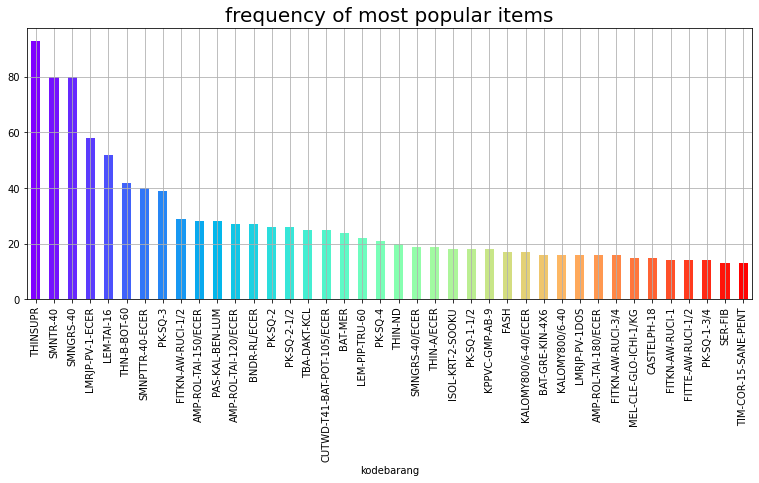

<Figure size 432x288 with 0 Axes>

In [10]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data_transaksi['kodebarang'].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()
plt.savefig("output_frequency.png")

In [11]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
fig, ax = plt.subplots(figsize=(13, 5))
data_transaksi['kodebarang'].value_counts().head(40).plot.bar(color=color, ax=ax)
ax.set_title('frequency of most popular items', fontsize=20)
ax.set_xticklabels(data_transaksi['kodebarang'].value_counts().head(40).index, rotation=90)
ax.grid()

# Save the plot as a pickle file
with open('plot.pkl', 'wb') as f:
    pickle.dump(fig, f)

plt.close()

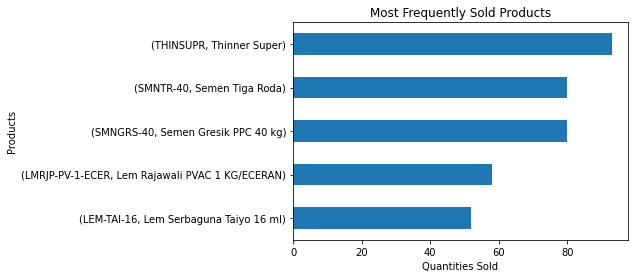

In [12]:
freqprod= data_transaksi.groupby(["kodebarang", "namabarang"])["namabarang"].count().sort_values(axis= 0,ascending =False)
freqprod.head(5)
top5freq = freqprod[:5,].sort_values(ascending = True)
top5freq.plot(kind = "barh")
plt.ylabel('Products')
plt.xlabel('Quantities Sold')
plt.title('Most Frequently Sold Products')
plt.savefig("output_most_frequently.jpeg")

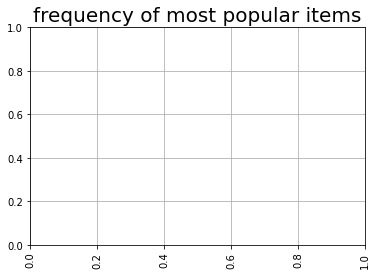

<Figure size 432x288 with 0 Axes>

In [13]:
# year = data_transaksi.groupby(data_transaksi['tanggaljual'].dt.strftime('%m'))['jumlah'].count()
# fig = px.bar(year, x=year.index, y=year, color=year,
#              labels={'y': 'Number of Sales',
#                      'tanggaljual': 'Months'})
# fig.update_layout(title_text='Number of Sales per Months',
#                   title_x=0.5, title_font=dict(size=18))
# fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
# fig.show()
# # plt.savefig('umber_of_sales.jpeg')
# fig.write_image("number_of_sales_per_month.png", width=1000, height=500)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
# data_transaksi['tanggaljual']..value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()
plt.savefig("output_frequency.png")

In [14]:
year = data_transaksi.groupby(data_transaksi['tanggaljual'].dt.strftime('%m'))['jumlah'].count()
fig = px.bar(year, x=year.index, y=year, color=year,
             labels={'y': 'Number of Sales',
                     'tanggaljual': 'Months'})
fig.update_layout(title_text='Number of Sales per Discrete Months',
                  title_x=0.5, title_font=dict(size=18))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

# Save the plot as a pickle file
with open('plot_per_month.pkl', 'wb') as f:
    pickle.dump(fig, f)

plt.close()

In [15]:
Frequency_of_items = data_transaksi.groupby(pd.Grouper(key='kodebarang')).size().reset_index(name='count')
fig = px.treemap(Frequency_of_items, path=['kodebarang'], values='count')
fig.update_layout(title_text='Frequency of the Items Sold',
                  title_x=0.5, title_font=dict(size=18)
                  )
fig.update_traces(textinfo="label+value")
# fig.show()
fig.write_image("frequency_item_sold.png", width=1000, height=500) 

In [16]:
Frequency_of_items = data_transaksi.groupby(pd.Grouper(key='kodebarang')).size().reset_index(name='count')
fig = px.treemap(Frequency_of_items, path=['kodebarang'], values='count')
fig.update_layout(title_text='Frequency of the Items Sold',
                  title_x=0.5, title_font=dict(size=18)
                  )
fig.update_traces(textinfo="label+value")

# Save the plot as a pickle file
with open('plot_frequency_items_sold.pkl', 'wb') as f:
    pickle.dump(fig, f)
plt.close()

##### RFM Analysis

Mengecek kapan faktur jual terbaru

In [17]:
import datetime
recent_date=data_transaksi['tanggaljual'].max()+ datetime.timedelta(days = 1)
data_transaksi['Days_since']=recent_date-data_transaksi['tanggaljual']
data_transaksi['Days_since']=data_transaksi['Days_since'].dt.days
cust_recent=data_transaksi.sort_values('Days_since',ascending=True)
top_10_recent=cust_recent.iloc[0:10,:]
top_10_sold_Amt=top_10_recent['subtotal'].sum()
total_sold_value=data_transaksi[['subtotal']].copy().sum()
pct_sales_top10=top_10_sold_Amt*100/total_sold_value
pct_sales_top10=pct_sales_top10['subtotal'].round(5)
print(f'Top 10 Recent Customers - {pct_sales_top10} % total sales')
top_10_recent.head(10)

Top 10 Recent Customers - 0.10996 % total sales


,fakturjual,tanggaljual,kodebarang,namabarang,satuan,harga,jumlah,subtotal,Days_since
18793,FJ20070275,2022-10-31,PK-SQ-1-1/2,Paku SQ 1 1/2,kg,20000.0,0.0,5000.0,1
18805,FJ20120135,2022-09-15,CAT-SEM-RJ-300-CLLAQ/B540,cat semprot RJ 300 cc Clear Lacquer (B 540),buah,24000.0,2.0,48000.0,47
18774,B/FJ20120156,2022-09-15,JTSHW-BAN-1/2,"Jet Shower Bano 1/2""",pc,50000.0,1.0,50000.0,47
18775,B/FJ20120157,2022-09-15,AMP-BLT-150/ECER,Amplas Bulat 150/ecer,pc,1000.0,25.0,25000.0,47
18776,B/FJ20120157,2022-09-15,AMP-BLT-80/ECER,Amplas Bulat 80/ecer,pc,1000.0,25.0,25000.0,47
18777,B/FJ20120158,2022-09-15,SMNPTTR-40-ECER,Semen Putih Tiga Roda 40 kg,kg,3000.0,1.0,3000.0,47
18778,B/FJ20120158,2022-09-15,KPPVC-GMP-AB-9,"Kapi PVC 9"" GMP abu2",pc,3000.0,1.0,3000.0,47
18779,B/FJ20120159,2022-09-15,LEM-TAI-16,Lem Serbaguna Taiyo 16 ml,pcs,5000.0,2.0,10000.0,47
18780,B/FJ20120159,2022-09-15,GER-BE-SAND-18,Gergaji Besi Sandflex no 18,pc,18000.0,1.0,18000.0,47
18781,FJ20120134,2022-09-15,"MTR-ESSN-7,5","Meteran Essen 7,5 mtr",pc,45000.0,1.0,45000.0,47


In [18]:
cust_recent

,fakturjual,tanggaljual,kodebarang,namabarang,satuan,harga,jumlah,subtotal,Days_since
18793,FJ20070275,2022-10-31,PK-SQ-1-1/2,Paku SQ 1 1/2,kg,20000.0,0.0,5000.0,1
18805,FJ20120135,2022-09-15,CAT-SEM-RJ-300-CLLAQ/B540,cat semprot RJ 300 cc Clear Lacquer (B 540),buah,24000.0,2.0,48000.0,47
18774,B/FJ20120156,2022-09-15,JTSHW-BAN-1/2,"Jet Shower Bano 1/2""",pc,50000.0,1.0,50000.0,47
18775,B/FJ20120157,2022-09-15,AMP-BLT-150/ECER,Amplas Bulat 150/ecer,pc,1000.0,25.0,25000.0,47
18776,B/FJ20120157,2022-09-15,AMP-BLT-80/ECER,Amplas Bulat 80/ecer,pc,1000.0,25.0,25000.0,47
...,...,...,...,...,...,...,...,...,...
15032,3182622,2022-01-04,STE,steenslag/coral,Rit/Pick,300000.0,1.0,300000.0,301
15031,3182622,2022-01-04,PAS-KAL-BEN-LUM,pasir kali bening lumajang,pick up,290000.0,1.0,290000.0,301
15030,3182623,2022-01-04,PK-SQ-2,"Paku SQ 2""",kg,17000.0,1.0,17000.0,301
15028,3182623,2022-01-04,STE,steenslag/coral,Rit/Pick,300000.0,1.0,150000.0,301


In [19]:
rfm=data_transaksi.groupby('kodebarang').agg({'Days_since':'min','fakturjual':'count','subtotal':'sum'}).reset_index()
rfm.rename({'Days_since':'Recency','fakturjual':'Frequency','subtotal':'Monetary_Value'},axis=1,inplace=True)
rfm.head()

,kodebarang,Recency,Frequency,Monetary_Value
0,ADDIB-KG,208,1,58000.0
1,ALK-MOWI-50,70,5,120000.0
2,ALLI-ELEC-TP-BLC,83,7,90000.0
3,ALSTEK-BROC-ARB,131,4,110000.0
4,ALSTKNT-ALISKN-LB1,83,3,19500.0


In [20]:
rfm = rfm.dropna()

In [21]:
# Create R_score, F_score, M_score by binning each of the variables into 4 bins

rfm['R_score']=pd.qcut(rfm['Recency'],4,[1,2,3,4])
rfm['F_score']=pd.qcut(rfm['Frequency'].rank(method="first"),4,[4,3,2,1],duplicates='drop')
rfm['M_score']=pd.qcut(rfm['Monetary_Value'],4,[4,3,2,1])
rfm['RFM_score']=(rfm['R_score'].astype(int)+rfm['F_score'].astype(int)+rfm['M_score'].astype(int))/3
rfm['RFM_segment'] = (rfm['R_score'].astype(str)+rfm['F_score'].astype(str)+rfm['M_score'].astype(str))

In [22]:
# rfm["Recency_Score"]  = pd.qcut(rfm['Recency'], 5, [5, 4, 3, 2, 1])
# rfm["Frequency_Score"]  = pd.qcut(rfm['Frequency'].rank(method="first"), 5, [1, 2, 3, 4, 5])
# rfm["Monetary_Score"]  = pd.qcut(rfm['Monetary_Value'], 5, [1, 2, 3, 4, 5])
# rfm["RFM_SCORE"] = (rfm['Recency_Score'].astype(str) +
#                     rfm['Frequency_Score'].astype(str)+
#                     rfm['Monetary_Score'].astype(str))

# rfm.head() 

In [23]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   kodebarang      1163 non-null   object  
 1   Recency         1163 non-null   int64   
 2   Frequency       1163 non-null   int64   
 3   Monetary_Value  1163 non-null   float64 
 4   R_score         1163 non-null   category
 5   F_score         1163 non-null   category
 6   M_score         1163 non-null   category
 7   RFM_score       1163 non-null   float64 
 8   RFM_segment     1163 non-null   object  
dtypes: category(3), float64(2), int64(2), object(2)
memory usage: 58.6+ KB


In [24]:
purchased_items_level =['Very High Purchased Items','High Purchased Items','Average Purchased Items','Very Low Purchased Items']
purchased_items_quartile = pd.qcut(rfm['RFM_score'], q=4, labels=purchased_items_level)
rfm['Purchased_Items_Level'] = purchased_items_quartile.values
rfm.head()

,kodebarang,Recency,Frequency,Monetary_Value,R_score,F_score,M_score,RFM_score,RFM_segment,Purchased_Items_Level
0,ADDIB-KG,208,1,58000.0,3,4,2,3.000000,342,Average Purchased Items
1,ALK-MOWI-50,70,5,120000.0,1,1,2,1.333333,112,Very High Purchased Items
2,ALLI-ELEC-TP-BLC,83,7,90000.0,1,1,2,1.333333,112,Very High Purchased Items
3,ALSTEK-BROC-ARB,131,4,110000.0,1,1,2,1.333333,112,Very High Purchased Items
4,ALSTKNT-ALISKN-LB1,83,3,19500.0,1,2,3,2.000000,123,High Purchased Items


In [ ]:
rfm.to_excel('rfm.xlsx')

In [25]:
rfm['Recency'].unique()

array([208,  70,  83, 131, 175,  69, 195, 276,  47, 185, 196, 215, 291,
       190, 262, 167, 186, 285, 133, 224, 288,  48,  60, 111, 189, 134,
       206, 130, 132, 147, 204, 263, 264, 129, 209, 197, 210, 152, 267,
       161, 164, 265, 159, 122, 166, 255, 232, 225, 192, 123, 218, 112,
       258, 301,  92, 252, 194, 187, 236, 235, 165, 207,  67, 151,  68,
       251, 168, 270, 230, 193, 227, 241, 278,  80, 217, 222, 274, 148,
       237, 106, 162, 283, 300, 234, 293, 280, 176, 202, 242, 271, 238,
       214,  61, 286, 216, 260, 297, 201, 277, 295, 145, 169, 174, 272,
       211, 228, 146, 221, 299, 199, 284, 266, 229, 158, 113, 171, 213,
       294, 116, 110, 256, 188, 290, 253, 172, 223, 173, 298, 239, 150,
       269,  66, 160, 157, 231, 287, 279, 203, 220, 250, 257, 281, 259,
        59,   1, 292, 154, 136], dtype=int64)

In [26]:
rfm['Frequency'].unique()

array([ 1,  5,  7,  4,  3,  8,  2, 12, 27, 28, 16, 10,  6,  9, 24, 11, 15,
       25, 17, 13, 14, 29, 18, 22, 52, 58, 26, 39, 21, 80, 19, 40, 20, 93,
       42], dtype=int64)

In [27]:
rfm.head

<bound method NDFrame.head of               kodebarang  Recency  Frequency  Monetary_Value R_score F_score  \
0               ADDIB-KG      208          1         58000.0       3       4   
1            ALK-MOWI-50       70          5        120000.0       1       1   
2       ALLI-ELEC-TP-BLC       83          7         90000.0       1       1   
3        ALSTEK-BROC-ARB      131          4        110000.0       1       1   
4     ALSTKNT-ALISKN-LB1       83          3         19500.0       1       2   
...                  ...      ...        ...             ...     ...     ...   
1158     ZNC-JAG-GL-GREY      113          1        127500.0       1       2   
1159      ZNC-JAG-GL-PUT      174          2        414000.0       2       2   
1160     ZNC-JAG-KG-BLAC      131          9        408000.0       1       1   
1161     ZNC-JAG-KG-GREY       47          7        272000.0       1       1   
1162      ZNC-JAG-KG-PUT      207          5        200000.0       3       1   

     M_sc

In [28]:
# rfm['RFM_Score'] = rfm.R_score.astype(str)+ rfm.F_score.astype(str) + rfm.M_score.astype(str)
# rfm.head()

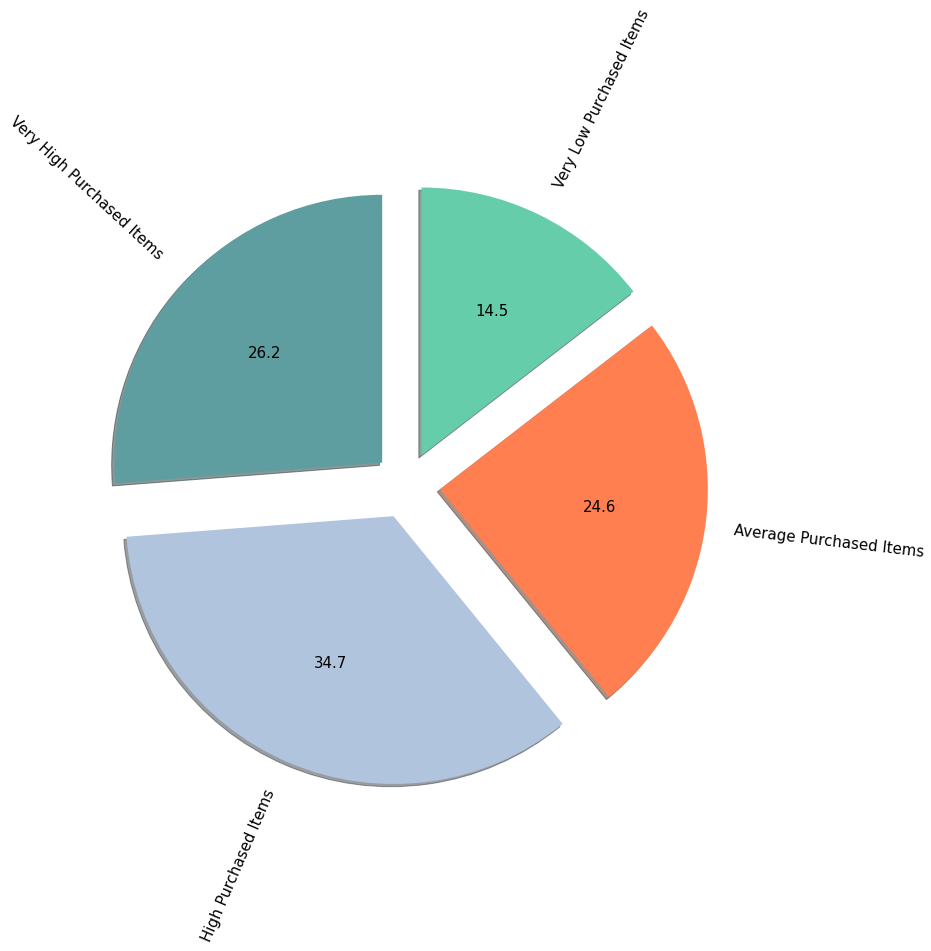

In [29]:
colors  = ("cadetblue", "lightsteelblue", "coral",  "mediumaquamarine")
explodes = [0.25, 0.25, 0.25, 0.25]

rfm["Purchased_Items_Level"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 15}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes,
                                                 figsize = (6,8))
plt.ylabel("");
# plt.savefig("output_pie_chart.jpeg")
figure = plt.gcf() # get current figure
# figure.set_size_inches(10, 10)
# when saving, specify the DPI
plt.savefig("myplot.png", dpi = 100, bbox_inches = 'tight')

In [30]:
colors = ("cadetblue", "lightsteelblue", "coral", "mediumaquamarine")
explodes = [0.25, 0.25, 0.25, 0.25]

fig, ax = plt.subplots()
rfm["Purchased_Items_Level"].value_counts(sort=False).plot.pie(ax=ax, colors=colors,
                                                               textprops={'fontsize': 15},
                                                               autopct='%4.1f',
                                                               startangle=90,
                                                               radius=2,
                                                               rotatelabels=True,
                                                               shadow=True,
                                                               explode=explodes,
                                                               figsize = (6,8))
ax.set_ylabel("")

# Save the plot as a pickle file
with open('plot_purchased_items_level.pkl', 'wb') as f:
    pickle.dump(fig, f)
plt.close()

In [31]:
fig = px.histogram(rfm, x="RFM_segment", 
                   marginal="violin", template="plotly_white",
                   hover_data=rfm.columns)
fig.update_layout(title=f'R_score score Distribution')
fig.show()
plt.savefig('outputs1_jpeg')

<Figure size 432x288 with 0 Axes>

C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\1407242873.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




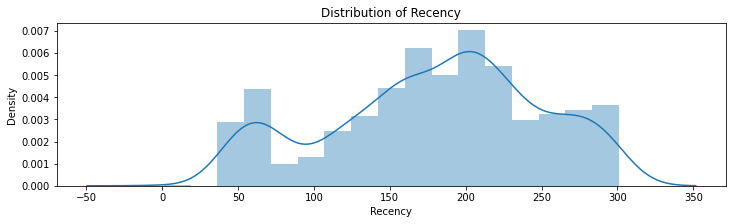

C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\1407242873.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




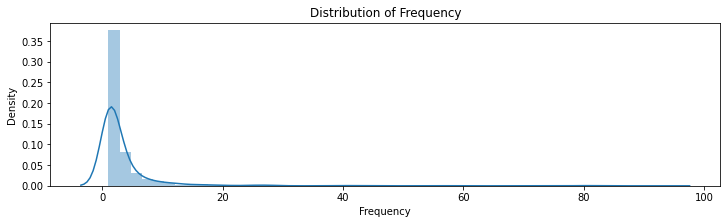

C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\1407242873.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




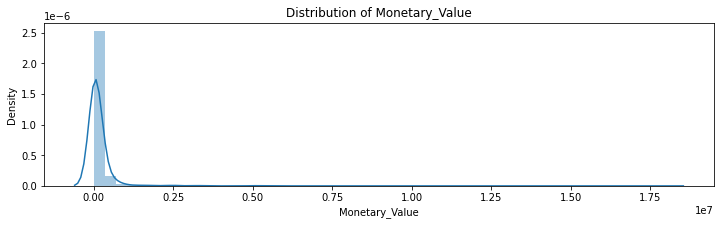

In [32]:
colnames = ['Recency', 'Frequency', 'Monetary_Value']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\3021979974.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\3021979974.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\3021979974.py:6: UserW

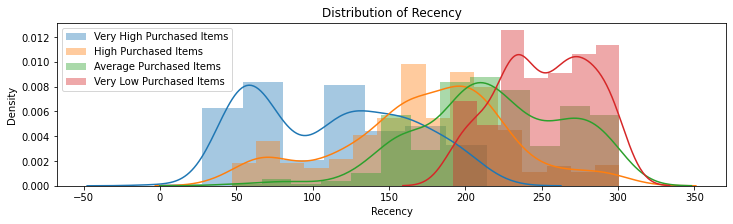

C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\3021979974.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\3021979974.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\3021979974.py:6: UserW

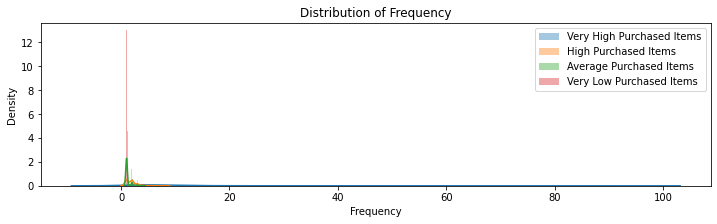

C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\3021979974.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\3021979974.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\3021979974.py:6: UserW

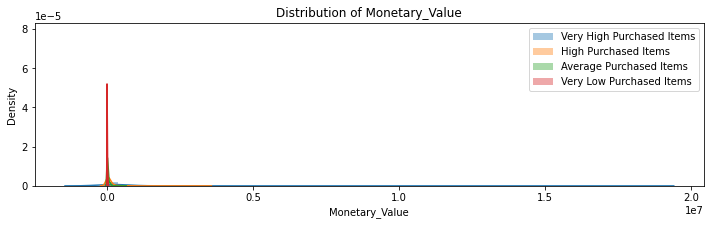

In [33]:
purchased_items_levels = ['Very High Purchased Items', 'High Purchased Items', 'Average Purchased Items', 'Very Low Purchased Items']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in purchased_items_levels:
        sns.distplot(rfm[rfm['Purchased_Items_Level']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

    # plot_filename = f'{col}_plot.png'
    # plot_filepath = os.path.join('plots', plot_filename)
    # plt.savefig(plot_filepath)
    # plt.close(fig)
    # print(f'Saved plot: {plot_filepath}')
    # plt.savefig("rfm.png", dpi = 100, bbox_inches = 'tight')
    # fig.write_image("rfm.png", width=1000, height=500) 

In [34]:
purchased_items_levels = ['Very High Purchased Items', 'High Purchased Items', 'Average Purchased Items', 'Very Low Purchased Items']
colnames = ['Recency','Frequency','Monetary_Value']  # Your list of column names

plot_files = {}  # Dictionary to store plot file paths

for col in colnames:
    fig, ax = plt.subplots(figsize=(12, 3))
    for segment in purchased_items_levels:
        sns.distplot(rfm[rfm['Purchased_Items_Level'] == segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()

    # Save the plot as an image file (PNG)
    plot_file_path = f'plot_{col}.png'
    plt.savefig(plot_file_path, dpi = 100, bbox_inches = 'tight')
    plt.close()

    # Store the plot file path in the dictionary
    plot_files[col] = plot_file_path

# Save the dictionary of plot file paths as a pickle file
with open('plot_files.pkl', 'wb') as f:
    pickle.dump(plot_files, f)
plt.close()

C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\2513186039.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\2513186039.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Christopher K\AppData\Local\Temp\ipykernel_20832\2513186039.py:9: UserW

In [35]:
rfm.describe()

,Recency,Frequency,Monetary_Value,RFM_score
count,1163.000000,1163.000000,1.163000e+03,1163.000000
mean,179.643164,3.264832,1.814174e+05,2.496417
std,69.189772,6.260443,8.135744e+05,0.873343
min,1.000000,1.000000,3.000000e+02,1.000000
25%,132.000000,1.000000,1.675000e+04,1.666667
50%,190.000000,1.000000,4.500000e+04,2.666667
75%,227.500000,3.000000,1.250000e+05,3.333333
max,301.000000,93.000000,1.794550e+07,4.000000


In [36]:
rfm[["Purchased_Items_Level","Recency", "Frequency", "Monetary_Value"]].groupby("Purchased_Items_Level").agg(["mean", "count","sum"])

Recency              Frequency              \
                                 mean count    sum      mean count   sum   
Purchased_Items_Level                                                      
Very High Purchased Items  112.127869   305  34199  8.259016   305  2519   
High Purchased Items       173.292804   403  69837  1.923077   403   775   
Average Purchased Items    217.972028   286  62340  1.167832   286   334   
Very Low Purchased Items   251.769231   169  42549  1.000000   169   169   

                          Monetary_Value                     
                                    mean count          sum  
Purchased_Items_Level                                        
Very High Purchased Items  512357.704918   305  156269100.0  
High Purchased Items       103108.560794   403   41552750.0  
Average Purchased Items     38753.846154   286   11083600.0  
Very Low Purchased Items    12325.147929   169    2082950.0

In [37]:
very_high = rfm.loc[rfm['Purchased_Items_Level'] == 'Very High Purchased Items']
very_high

,kodebarang,Recency,Frequency,Monetary_Value,R_score,F_score,M_score,RFM_score,RFM_segment,Purchased_Items_Level
1,ALK-MOWI-50,70,5,120000.0,1,1,2,1.333333,112,Very High Purchased Items
2,ALLI-ELEC-TP-BLC,83,7,90000.0,1,1,2,1.333333,112,Very High Purchased Items
3,ALSTEK-BROC-ARB,131,4,110000.0,1,1,2,1.333333,112,Very High Purchased Items
6,ALSTKNT-ALISKN-LB3,70,8,238000.0,1,1,1,1.000000,111,Very High Purchased Items
29,AMP-ROL-TAI-100/ECER,47,12,122000.0,1,1,2,1.333333,112,Very High Purchased Items
...,...,...,...,...,...,...,...,...,...,...
1158,ZNC-JAG-GL-GREY,113,1,127500.0,1,2,1,1.333333,121,Very High Purchased Items
1159,ZNC-JAG-GL-PUT,174,2,414000.0,2,2,1,1.666667,221,Very High Purchased Items
1160,ZNC-JAG-KG-BLAC,131,9,408000.0,1,1,1,1.000000,111,Very High Purchased Items
1161,ZNC-JAG-KG-GREY,47,7,272000.0,1,1,1,1.000000,111,Very High Purchased Items


In [38]:
high = rfm.loc[rfm['Purchased_Items_Level'] == 'High Purchased Items']
high

,kodebarang,Recency,Frequency,Monetary_Value,R_score,F_score,M_score,RFM_score,RFM_segment,Purchased_Items_Level
4,ALSTKNT-ALISKN-LB1,83,3,19500.0,1,2,3,2.000000,123,High Purchased Items
8,AMP-BLT-120,195,2,160000.0,3,2,1,2.000000,321,High Purchased Items
10,AMP-BLT-150/ECER,47,3,40000.0,1,2,3,2.000000,123,High Purchased Items
11,AMP-BLT-240/ECER,185,3,80000.0,2,2,2,2.000000,222,High Purchased Items
12,AMP-BLT-60,196,2,160000.0,3,2,1,2.000000,321,High Purchased Items
...,...,...,...,...,...,...,...,...,...,...
1152,WOSTA-IMP-CANBRO-CA-KG,197,1,70000.0,3,2,2,2.333333,322,High Purchased Items
1153,WOSTA-IMP-COCBR-KG,196,1,70000.0,3,2,2,2.333333,322,High Purchased Items
1154,WOSTA-IMP-DARMAH-KG,151,1,78000.0,2,2,2,2.000000,222,High Purchased Items
1155,WTRPASS-MN-FRT-9,92,1,20000.0,1,2,3,2.000000,123,High Purchased Items


In [39]:
average_high = rfm.loc[rfm['Purchased_Items_Level'] == 'Average Purchased Items']
average_high

,kodebarang,Recency,Frequency,Monetary_Value,R_score,F_score,M_score,RFM_score,RFM_segment,Purchased_Items_Level
0,ADDIB-KG,208,1,58000.0,3,4,2,3.000000,342,Average Purchased Items
5,ALSTKNT-ALISKN-LB2,175,1,11000.0,2,4,4,3.333333,244,Average Purchased Items
7,AMP-BLT-100/ECER,69,1,10000.0,1,4,4,3.000000,144,Average Purchased Items
9,AMP-BLT-120/ECER,276,2,12000.0,4,2,4,3.333333,424,Average Purchased Items
16,AMP-FLPD-240,190,1,7500.0,2,4,4,3.333333,244,Average Purchased Items
...,...,...,...,...,...,...,...,...,...,...
1136,TWS,187,1,7500.0,2,3,4,3.000000,234,Average Purchased Items
1139,VER-BR,160,1,3500.0,2,3,4,3.000000,234,Average Purchased Items
1141,VER-HTM,262,2,9000.0,4,2,4,3.333333,424,Average Purchased Items
1142,VER-KNG,160,1,6000.0,2,3,4,3.000000,234,Average Purchased Items


In [40]:
very_low = rfm.loc[rfm['Purchased_Items_Level'] == 'Very Low Purchased Items']
very_low

,kodebarang,Recency,Frequency,Monetary_Value,R_score,F_score,M_score,RFM_score,RFM_segment,Purchased_Items_Level
13,AMP-BLT-60/ECER,215,1,15000.0,3,4,4,3.666667,344,Very Low Purchased Items
15,AMP-FLPD-100,291,1,7500.0,4,4,4,4.000000,444,Very Low Purchased Items
17,AMP-FLPD-40,262,1,7500.0,4,4,4,4.000000,444,Very Low Purchased Items
25,AMP-INA320-LBR,224,1,8000.0,3,4,4,3.666667,344,Very Low Purchased Items
28,AMP-NORT1000-LBR,288,1,4000.0,4,4,4,4.000000,444,Very Low Purchased Items
...,...,...,...,...,...,...,...,...,...,...
1036,SKR-KY-CHW-3X12/ECER,237,1,4000.0,4,3,4,3.666667,434,Very Low Purchased Items
1045,SLG-FLEK-LIST-50,290,1,5000.0,4,3,4,3.666667,434,Very Low Purchased Items
1077,"SOK-NEP/RIN-CHR-1/2-2""",280,1,13000.0,4,3,4,3.666667,434,Very Low Purchased Items
1078,SOK-NEP/RIN-CHR-1/2X3/4,234,1,8500.0,4,3,4,3.666667,434,Very Low Purchased Items


#### Import To Database for Dataframe RFM

In [41]:
# Credentials to database connection
hostname="localhost"
dbname="dbrajawali"
uname="root"
pwd=""

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

# Convert dataframe to sql table
rfm.to_sql('rfm', engine, index=False, if_exists='replace')

1163

In [42]:
# Credentials to database connection
hostname="localhost"
dbname="dbrajawali"
uname="root"
pwd=""

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

# Convert dataframe to sql table
data_transaksi.to_sql('data_transaksi_2022', engine, index=False, if_exists='replace')

3797

Very High Purchased Items: 22.1% atau terdapat 778 barang dimana kategori ini memiliki tingkat pendapatan penjualan yang tinggi dengan frekuensi barang yang terjual juga tinggi dengan pembelian terbaru terjadi baru-baru ini.

High Purchased Items: 25.6% atau terdapat 656 barang dimana kategori ini memiliki tingkat pendapatan penjualan yang tinggi dengan frekuensi barang yang terjual juga tinggi namun dengan pembelian terbaru terjadi lebih lama dari biasanya.

Average Purchased Items: 17.3% atau terdapat 572 barang dimana pada kategori ini tingkat pembelian serta frekuensi dan pendapatan yang dihasilkan tinggi namun waktu pembelian barang terakhir sedikit lebih lama dari biasanya.

Untuk kategori barang Very Low Purchased Items kategori ini mencakup 34.9 % data yang tersedia atau terdapat 887 barang dimana pembelian barang ini cukup jarang terjadi dengan pendapatan dan frekuensi barang terjual bisa tinggi atau rendah. Untuk kategori barang ini, maka toko perlu memberikan diskon agar dapat meningkatkan penjualan pada kategori barang ini atau menghentikan penjualan produk ini agar toko dapat berfokus pada barang-barang yang termasuk dalam golongan Very High, High, dan Average Purchased Items.
